<a href="https://colab.research.google.com/github/DiahKurnillah/Praktikum-Komputasi-Biomedis/blob/main/KombioPrak_ChapV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 5. System of Linear Equation: Jacobi & Gauss Seidel Iteration**

---
**Tujuan:** Menentukan solusi dari sistem persamaan linear dengan menggunakan metode iterasi Jacobi dan iterasi Gauss-Seidel.

**Literature Review**

Untuk meminimalisir kesalahan dalam proses pembulatan pada metode eliminasi Gauss, sistem persamaan linear dapat diselesaikan dengan menggunakan metode iterasi. Terdapat dua jenis metode iterasi, yaitu metode iterasi Jacobi dan metode iterasi Gauss-Seidel.
Bentuk umum dari persamaan linear ditunjukkan di bawah ini.
$$a11 x1 + a12 x2............. + a1n x_n = b1$$
$$a21 x1+ a22 x2.............. + a2n x_n = b2$$
$$a21 x1+ a32 x2.............. + a3n x_n = b3$$
$$.......................................$$
$$an1 x1 + an2 x2............. + ann x_n = bn$$
dengan $𝑎𝑘 ≠ 0, k = 1,2,...,𝑛$ maka persamaan iterasi dapat dituliskan sebagai berikut.
$$x_n^{k+1} = b_n - \frac{a_{n1}x_1^k + a_{n2}x_2^k + \dots + a_{n(n-1)}x_{n-1}^k}{a_{nn}}$$

Sebagai kondisi penghentian iterasi, persamaan kesalahan relatif di bawah ini dapat digunakan.
$$|\frac {𝑥_𝑖^{𝑘+1}-𝑥_𝑖^𝑘}{𝑥_𝑖^{𝑘+1}}|<𝜀$$
Syarat untuk mendapatkan iterasi yang konvergen adalah $|𝑎𝑖𝑖|>Σ^n_{𝑗=1,𝑗≠𝑖}|𝑎𝑖𝑗|$
1. Metode Iterasi Jacobi
Jika tebakan awal adalah $X (0)$,
$$X (0) = (x1 (0), x2 (0), ... , xn (0))$$
maka prosedur iterasi didefinisikan dengan menggunakan persamaan berikut.
$$𝑥_𝑖{𝑘+1}=\frac{𝑏_𝑖-Σ^n_{𝑗=𝑖, 𝑗≠𝑖}𝑎𝑖𝑗𝑥_𝑗^𝑘}{𝑎𝑖𝑖} , k = 0, 1, 2, ...$$
2. Metode Iterasi Gauss-Seidel
Pada metode iterasi Gauss-Seidel, setiap x baru yang baru saja diperoleh langsung digunakan untuk persamaan berikutnya. Prosedur iterasi didefinisikan dengan menggunakan persamaan berikut.
$$𝑥_𝑖^{𝑘+1}=\frac{𝑏_𝑖-Σ^n_{𝑗=𝑖, 𝑗≠𝑖}𝑎𝑖𝑗𝑥_𝑗^{𝑘+1}-Σ^n_{𝑗=𝑖, 𝑗≠𝑖}𝑎𝑖𝑗𝑥_𝑗^𝑘}{𝑎𝑖𝑖} , k=0, 1, 2, ...$$

# Prelimiary Task
Ada beberapa persamaan linear, sebagai berikut:
$$2x1 + x2 - 5x3 = 9$$
$$x1 - 5x2 - x3 = 14$$
$$3x1 - x2 - 3x3 = 26$$
Tentukan x1, x2, dan x3 dengan menggunakan iterasi Jacobi dan Metode Gauss-Seidel ($x1(0)=1, x2(0)=x3(0)=2$, lakukan iterasi hingga iterasi ketiga)


## Metode Jacobi

In [ ]:
from numpy import *
import numpy as np
from prettytable import PrettyTable

t1 = PrettyTable()
t1.field_names = ['Iterasi', 'X1', 'X2', 'X3']

a = np.array([[7,-1,-3],[1,-5,-1],[2,1,-5]])
b = np.array([[26],[14],[9]])
xawal = np.array([[1.0],[2.0],[2.0]])
n = len(a)
xbaru = zeros((n,1),float)
max = 3
k = 0

while k < max:
    for i in range(0, n):
        sum = 0
        for j in range(0, n):
            if j != i:
                sum += a[i][j] * xawal[j]
        xbaru[i] = (b[i] - sum) / a[i][i]
    xawal[:] = xbaru[:]
    t1.add_row([k + 1, round(xbaru[0, 0], 4), round(xbaru[1, 0], 4), round(xbaru[2, 0], 4)])
    k += 1

print ('Metode Jacobi')
print(t1)


Metode Jacobi
+---------+--------+---------+---------+
| Iterasi |   X1   |    X2   |    X3   |
+---------+--------+---------+---------+
|    1    | 4.8571 |   -3.0  |   -1.0  |
|    2    | 2.8571 | -1.6286 | -0.4571 |
|    3    | 3.2857 | -2.1371 | -0.9829 |
+---------+--------+---------+---------+


## Metode Gauss Seidel

In [ ]:
from numpy import *
import numpy as np
from prettytable import PrettyTable

t1 = PrettyTable()
t1.field_names = ['Iterasi', 'X1', 'X2', 'X3']

a = np.array([[7,-1,-3],[1,-5,-1],[2,1,-5]])
b = np.array([[26],[14],[9]])
xawal = np.array([[1.0],[2.0],[2.0]])
n = len(a)
xbaru = zeros((n,1),float)
max = 3
k = 0

while k < max:
    for i in range(0, n):
        sum = 0
        for j in range(0, n):
            if j != i:
                sum += a[i][j] * xawal[j]
        xbaru[i] = (b[i] - sum) / a[i][i]
        xawal[:] = xbaru[:]
    t1.add_row([k + 1, round(xbaru[0, 0], 4), round(xbaru[1, 0], 4), round(xbaru[2, 0], 4)])
    k += 1

print('Metode Gauss-Seidel')
print(t1)


Metode Gauss-Seidel
+---------+--------+---------+---------+
| Iterasi |   X1   |    X2   |    X3   |
+---------+--------+---------+---------+
|    1    | 4.8571 | -1.8286 | -0.2229 |
|    2    | 3.3576 | -2.0839 | -0.8738 |
|    3    | 3.0421 | -2.0168 | -0.9865 |
+---------+--------+---------+---------+


Jika tidak dilakukan limit jumlah iterasi, maka program akan terus melakukan looping akan terus berlanjut dengan hasil yang semakin kecil. Metode Jacobi dan metode Gauss-Seidel memiliki perbedaan dalam cara mereka mengupdate nilai variabel pada setiap iterasi.

Metode Jacobi menghitung semua variabel baru berdasarkan nilai variabel lama pada iterasi yang sama, sementara metode Gauss-Seidel menggunakan nilai variabel baru yang telah dihitung pada iterasi saat itu juga.

Jadi, meskipun keduanya menghasilkan solusi yang konvergen ke solusi yang sama seiring dengan bertambahnya iterasi, nilai $x_1, x_2,$ dan $x_3$ pada setiap iterasi mungkin berbeda antara metode Jacobi dan metode Gauss-Seidel.

# Task 1
Selesaikan permasalah biomedis “Drug development and toxicity studies: animal-on-a-chip“. (Reference: King M.R and Mody N.A , 2010, “Numerical and Statistical Methods for Bioengineering”, Cambridge University Press, New York , page 48) dengan menggunakan metode iterasi Jacobi dan metode iterasi Gauss-Seidel! Analisislah kelebihan dan kekurangan dari kedua metode tersebut!

## Metode Jacobi


R =  0.6
+-----------------+---------+--------------+
|        A        |    B    |  Hasil SPL   |
+-----------------+---------+--------------+
| [18.409 -0.5  ] | [2.818] | [0.16177675] |
| [ 0.3   -2.337] |  [-0.7] | [0.32029655] |
+-----------------+---------+--------------+

R =  0.65
+-----------------+---------+--------------+
|        A        |    B    |  Hasil SPL   |
+-----------------+---------+--------------+
| [18.409 -0.5  ] | [2.818] | [0.16211508] |
| [ 0.325 -2.262] |  [-0.7] | [0.33275305] |
+-----------------+---------+--------------+

R =  0.7
+-----------------+---------+--------------+
|        A        |    B    |  Hasil SPL   |
+-----------------+---------+--------------+
| [18.409 -0.5  ] | [2.818] | [0.16247692] |
| [ 0.35  -2.187] |  [-0.7] | [0.34607541] |
+-----------------+---------+--------------+

R =  0.75
+-----------------+---------+--------------+
|        A        |    B    |  Hasil SPL   |
+-----------------+---------+--------------+
| [18.409 -0.

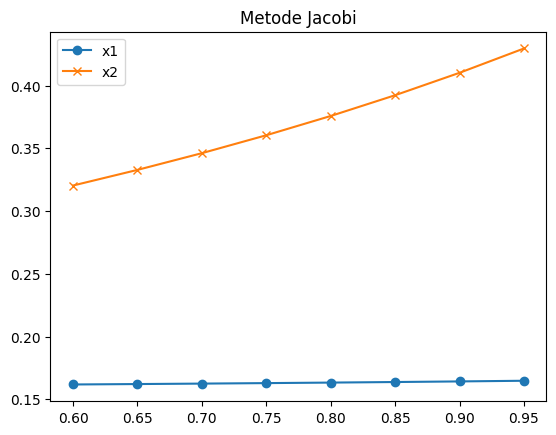

In [ ]:
import numpy as np
from prettytable import PrettyTable
import pylab

t = PrettyTable()
t.field_names = ['R', 'x1', 'x2']

x1final = []
x2final = []
R = []

for r in np.arange(0.6, 1.0, 0.05):
    print('\nR = ', round(r, 2))

    A = np.array([[18.409, -0.5], [0.5 * r, (1.5 * r - 3.237)]])
    B = np.array([[2.818], [-0.7]])
    n = len(A)
    xawal = np.zeros((n, 1), float)
    xbaru = np.zeros((n, 1), float)
    maxter = 15
    k = 0

    while k <= maxter:
        for i in range(0, n):
            sum = 0
            for j in range(0, n):
                if j != i:
                    sum += A[i, j] * xawal[j]
            xbaru[i] = (B[i] - sum) / A[i, i]
        xawal[:] = xbaru[:]
        k += 1

    x1final.append(xbaru[0, 0])
    x2final.append(xbaru[1, 0])
    R.append(round(r, 2))
    t.add_row([round(r, 2), xbaru[0, 0], xbaru[1, 0]])

    # Menampilkan tabel A, B, dan hasil SPL untuk setiap iterasi R
    t1 = PrettyTable()
    t1.field_names = ['A', 'B', 'Hasil SPL']
    for i in range(n):
        t1.add_row([A[i], B[i], xbaru[i]])

    print(t1)

print('\n\t HASIL METODE ITERASI JACOBI \t\t')
print(t)
pylab.title('Metode Jacobi')
pylab.plot(R, x1final, '-o', label='x1')
pylab.plot(R, x2final, '-x', label='x2')
pylab.legend()
pylab.show()


## Metode Gauss Seidel

Tebakan awal = 
 [[0.]
 [0.]]

R =  0.6
+-------------------+------------+----------------+
|         A         |     B      |   Hasil SPL    |
+-------------------+------------+----------------+
|  [[18.409 -0.5  ] | [[ 2.818]  | [[0.16177675]  |
|  [ 0.3   -2.337]] |  [-0.7  ]] |  [0.32029655]] |
+-------------------+------------+----------------+

R =  0.65
+-------------------+------------+----------------+
|         A         |     B      |   Hasil SPL    |
+-------------------+------------+----------------+
|  [[18.409 -0.5  ] | [[ 2.818]  | [[0.16211508]  |
|  [ 0.325 -2.262]] |  [-0.7  ]] |  [0.33275305]] |
+-------------------+------------+----------------+

R =  0.7
+-------------------+------------+----------------+
|         A         |     B      |   Hasil SPL    |
+-------------------+------------+----------------+
|  [[18.409 -0.5  ] | [[ 2.818]  | [[0.16247692]  |
|  [ 0.35  -2.187]] |  [-0.7  ]] |  [0.34607541]] |
+-------------------+------------+----------------+

R 

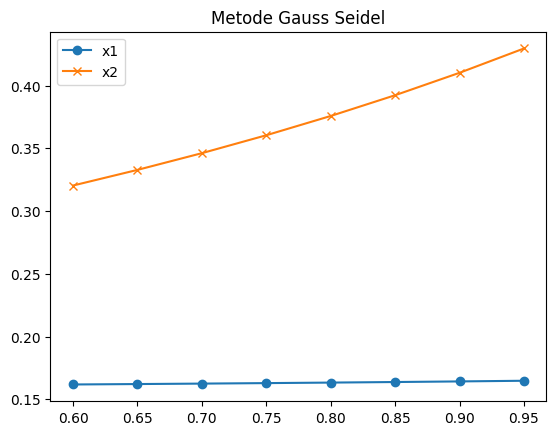

In [ ]:
import numpy as np
from prettytable import PrettyTable
import pylab

t = PrettyTable()
t1 = PrettyTable()
t2 = PrettyTable()
t2.field_names = ['R', 'x1', 'x2']
xawal = np.array([[0.0], [0.0]])
print('Tebakan awal = \n', xawal)

x1final = []
x2final = []
R = []

for r in np.arange(0.6, 1.0, 0.05):
    t1.field_names = ['A', 'B', 'Hasil SPL']

    print('\nR = ', (round(r, 2)))

    A = np.array([[18.409, -0.5], [0.5 * r, (1.5 * r - 3.237)]])
    B = np.array([[2.818], [-0.7]])
    n = len(A)
    xbaru = np.zeros((n, 1), float)
    error = np.zeros((n, 1), float)
    maxter = 15
    k = 0

    x1 = []
    x2 = []
    kx = []

    while k <= maxter:
        for i in range(0, n):
            sum = 0
            for j in range(0, n):
                if j != i:
                    sum = sum + (A[i, j] * xawal[j])
            xbaru[i] = (B[i] - sum) / A[i, i]
            error[i] = np.sqrt((xbaru[i] - xawal[i]) / xbaru[i] ** 2)
            xawal[:] = xbaru[:]
        x1.append(xbaru[0, 0])
        x2.append(xbaru[1, 0])
        kx.append(k)
        if k == maxter:  # Menampilkan hasil pada iterasi terakhir di tabel t
            t.field_names = ['R', 'x1', 'x2']
            t.add_row([round(r, 2), round(xbaru[0, 0], 5), round(xbaru[1, 0], 5)])
        k += 1

    x1final.append(xbaru[0, 0])
    x2final.append(xbaru[1, 0])
    R.append(round(r, 2))
    t1.add_row([A, B, xbaru])
    t2.add_row([round(r, 2), xbaru[0, 0], xbaru[1, 0]])
    t.align = 'c'
    t1.align = 'c'
    print(t1)
    t.clear()
    t1.clear()

# Menampilkan hasil tabel pada iterasi terakhir saja
print('\n\t HASIL METODE GAUSS SEIDEL \t\t')
print(t2)
pylab.title('Metode Gauss Seidel')
pylab.plot(R, x1final, '-o', label='x1')
pylab.plot(R, x2final, '-x', label='x2')
pylab.legend()
pylab.show()


Hasil dari metode iteratif Jacobi dan Gauss-Seidel tampaknya identik. Pada setiap iterasi, nilai variabel dan pada kedua metode mengalami perubahan yang sangat kecil, yang menunjukkan konvergensi metode. Oleh karena itu, baik metode Jacobi maupun Gauss-Seidel memberikan solusi yang serupa untuk sistem persamaan linear yang diberikan.
Kedua metode ini adalah metode iteratif yang digunakan untuk menemukan solusi dari sistem persamaan linear. Metode Jacobi dan Gauss-Seidel biasanya digunakan ketika matriks koefisien pada sistem persamaan linear bersifat diagonal dominan atau mendekati diagonal dominan. Dalam kasus ini, baik metode Jacobi maupun Gauss-Seidel cenderung konvergen dengan baik.
Dapat dianalisis kelebihan dan kekurangan dari kedua metode tersebut:
1.	Metode iterative Jacobi
-	Kelebihan
a.	Mudah diimplementasikan secara paralel, dimana setiap komponen Solusi Xi dapat diperbaharui secara independent.
b.	Cocok digunakan pada sistem persamaan linear yang tidak terlalu kompleks dan memiliki sifat diagonal dominan.
-	Kekurangan
a.	Tidak selalu cepat konvergen, terutama pada sistem persamaan linear yang tidak diagonal dominan, bahkan metode ini bisa jadi divergen.
2.	Metode iterative Gauss-Seidel
-	Kelebihan
a.	Cenderung lebih konvergen lebih cepat dibandingkan metode Jacobi karena mengupdate nilai variable secepat mungkin.
b.	Lebih cocok untuk sistem persamaan linear yang kompleks dan tidak memiliki sifat diagonal dominan.
-	Kekurangan
a.	Bergantung pada urutan variable dalam sistem persamaan, jadi tidak dapat digunakan secara paralel seperti metode Jacobi.
b.	Jika matriks koefisien memiliki kondisi yang buruk, hasil bisa tidak konvergen.


# Task 2
A doctor suggest a patient to follow a diet program based on the table below.

| Nutrient          | Non-fat Milk | Soy Flour | Whey  | Amounts (gr) supplied by Cambridge Diet in One Day |
|-------------------|--------------|-----------|-------|----------------------------------------------------|
| Protein (gr)      | 36           | 51        | 13    | 33                                                 |
| Carbohydrate (gr) | 52           | 34        | 74    | 45                                                 |
| Fat (gr)          | 0            | 7         | 11    | 3                                                  |

Please find how much non-fat milk-soy flour, and whey that are needed to fulfill the amounts of protein, carbohydrate, and fat each day ideally?


## Metode Jacobi

+---------+------------+----------+------------+----------+-----------+----------+
| Iterasi |     x1     | error x1 |     x2     | error x2 |     x3    | error x3 |
+---------+------------+----------+------------+----------+-----------+----------+
|    1    |  86.53846  |   1.0    |  64.70588  |   1.0    |  27.27273 |   1.0    |
|    2    |  5.41958   | 14.96774 |  -3.33196  | 20.41975 | -13.90374 | 2.96154  |
|    3    | 108.50315  | 0.95005  |  64.42439  | 1.05172  |  29.39307 | 1.47303  |
|    4    |  2.58623   | 40.9542  | -19.37693  |  4.3248  | -13.72461 | 3.14163  |
|    5    | 118.73917  | 0.97822  |  66.37874  | 1.29191  |  39.6035  | 1.34655  |
|    6    | -13.22185  | 9.98053  | -29.20501  | 3.27285  | -14.96829 | 3.64583  |
|    7    | 126.93507  | 1.10416  |  77.8544   | 1.37512  |  45.85773 | 1.32641  |
|    8    | -29.62542  | 5.28467  | -36.58457  | 3.12807  | -22.27098 | 3.05908  |
|    9    | 142.15246  | 1.20841  |  91.29486  | 1.40073  |  50.55382 | 1.44054  |
|   

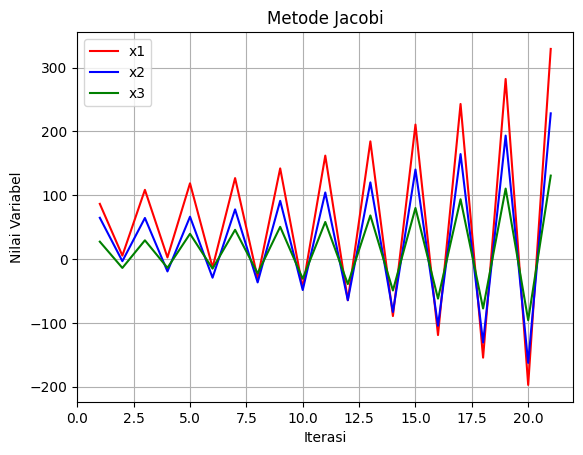

In [ ]:
import numpy as np
from prettytable import PrettyTable
import pylab

t = PrettyTable()
t.field_names = ['Iterasi', 'x1', 'error x1', 'x2', 'error x2', 'x3', 'error x3']

A = np.array([[0.52, 0.34, 0.74], [0.36, 0.51, 0.13], [0, 0.07, 0.11]])
B = np.array([[45], [33], [3]])
xawal = np.zeros((len(A), 1), float)
xbaru = np.zeros((len(A), 1), float)
error = np.zeros((len(A), 1), float)
max_iter = 20
k = 0

x_results = []

while k <= max_iter:
    for i in range(len(A)):
        sum_ = np.dot(A[i, :i], xawal[:i]) + np.dot(A[i, i + 1:], xawal[i + 1:])
        xbaru[i] = (B[i] - sum_) / A[i, i]
        error[i] = np.abs((xbaru[i] - xawal[i]) / xbaru[i])
    xawal[:] = xbaru[:]

    x_results.append(xbaru.flatten().tolist())

    k += 1

    t.add_row([k, round(xbaru[0, 0], 5), round(error[0, 0], 5), round(xbaru[1, 0], 5), round(error[1, 0], 5),
               round(xbaru[2, 0], 5), round(error[2, 0], 5)])

t.align = 'c'
print(t)
print('Hasil SPL = \n', xbaru)

# Plotting results
x_results = np.array(x_results).T
pylab.plot(range(1, max_iter + 2), x_results[0], '-r', label='x1')
pylab.plot(range(1, max_iter + 2), x_results[1], '-b', label='x2')
pylab.plot(range(1, max_iter + 2), x_results[2], '-g', label='x3')
pylab.xlabel('Iterasi')
pylab.title('Metode Jacobi')
pylab.ylabel('Nilai Variabel')
pylab.legend()
pylab.grid(True)
pylab.show()


Hasil menujukkan bahwa hasil tidak konvergen, hal ini ditunjukkan dari hasil perhitungan SPL

$0,36(329.40819598)+0,51(228.40483845)+0,13(130.84096417)≠33$
$0,52(329.40819598)+0,34(228.40483845)-0,74(130.84096417)≠45$
$0,00(329.40819598)+0,007(228.40483845)+0,11(130.84096417)≠3$
 Hasil perhitungan, didapat nilai yang dihasilkan dari persamaan tersebut tidak mendekati nilai yang diharapkan. Sehingga hasil sistem persamaan linear menggunakan metode jacobi tidak dapat digunakan.

Berdasarkan plot hasil program, tampak bahwa metode jacobi hasilnya berfluaktif dan tidak mengarah pada satu nilai. Hasil sistem persamaan linear menggunakan metode Jacobi bersifat divergen.

## Metode Gauss Seidel

+---------+----------+----------+----------+----------+----------+----------+
| Iterasi |    x1    | error x1 |    x2    | error x2 |    x3    | error x3 |
+---------+----------+----------+----------+----------+----------+----------+
|    0    | 86.53846 | 1.00000  | 3.61991  | 1.00000  | 24.96915 | 1.00000  |
|    1    | 48.63858 | 0.77921  | 24.00808 | 0.84922  | 11.99486 | 1.08165  |
|    2    | 53.77127 | 0.09545  | 23.69218 | 0.01333  | 12.19588 | 0.01648  |
|    3    | 53.69174 | 0.00148  | 23.69708 | 0.00021  | 12.19277 | 0.00026  |
|    4    | 53.69297 | 0.00002  |  23.697  | 0.00000  | 12.19282 | 0.00000  |
|    5    | 53.69295 | 0.00000  |  23.697  | 0.00000  | 12.19282 | 0.00000  |
|    6    | 53.69295 | 0.00000  |  23.697  | 0.00000  | 12.19282 | 0.00000  |
|    7    | 53.69295 | 0.00000  |  23.697  | 0.00000  | 12.19282 | 0.00000  |
|    8    | 53.69295 | 0.00000  |  23.697  | 0.00000  | 12.19282 | 0.00000  |
|    9    | 53.69295 | 0.00000  |  23.697  | 0.00000  | 12.19282

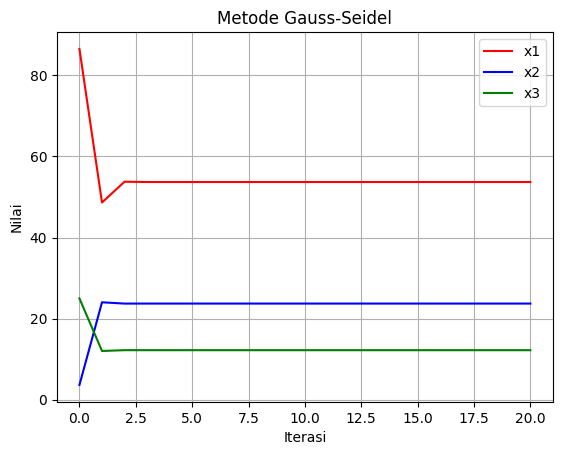

In [ ]:
import numpy as np
import pylab
from prettytable import PrettyTable

t = PrettyTable()
t.field_names = ['Iterasi', 'x1', 'error x1', 'x2', 'error x2', 'x3', 'error x3']

A = np.array([[0.52, 0.34, 0.74], [0.36, 0.51, 0.13], [0, 0.07, 0.11]])
B = np.array([[45], [33], [3]])
x_awal = np.array([[0.0], [0.0], [0.0]])
n = len(A)
x_baru = np.zeros((n, 1), float)
error = np.zeros((n, 1), float)
max_iter = 20
k = 0

x1 = []
x2 = []
x3 = []
kx = []

while k <= max_iter:
    for i in range(0, n):
        total_sum = 0
        for j in range(0, n):
            if j != i:
                total_sum += A[i, j] * x_awal[j]
        x_baru[i] = (B[i] - total_sum) / A[i, i]
        error[i] = np.abs((x_baru[i] - x_awal[i]) / x_baru[i])
        x_awal[:] = x_baru[:]

    x1.append(x_baru[0, 0])
    x2.append(x_baru[1, 0])
    x3.append(x_baru[2, 0])
    kx.append(k)
    t.add_row([k, round(x_baru[0, 0], 5), f"{error[0, 0]:.5f}", round(x_baru[1, 0], 5), f"{error[1, 0]:.5f}", round(x_baru[2, 0], 5),
               f"{error[2, 0]:.5f}"])

    k += 1

t.align = 'c'
print(t)
print('Hasil SPL = \n', x_baru)

pylab.plot(kx, x1, '-r', label='x1')
pylab.plot(kx, x2, '-b', label='x2')
pylab.plot(kx, x3, '-g', label='x3')
pylab.xlabel('Iterasi')
pylab.ylabel('Nilai')
pylab.title('Metode Gauss-Seidel')
pylab.legend()
pylab.grid(True)
pylab.show()


Metode yang bisa digunakan untuk menyelesaikan sistem persamaan linear ini adalah metode iterasi Gauss-Seidel karena hasil yang didapat bersifat konvergen. Maka, hasil yang didapatkan adalah susu non lemak adalah 53,69295166 gram,susu kedelai 23,69700243 gram, dan whey 12.19281664 gram.
Berdasarkan plot hasil program, tampak bahwa metode Gauss-Seidel mengarah pada satu nilai. Hasil sistem persamaan linear menggunakan metode Jacobi bersifat konvergen.

# Task 3

Please define i12, i52, i32, i65, i54, i13, V2, V3, V4, V5, if the following information is known.

R12 = 5 Ω; R23 = 10 Ω; R34 = 5 Ω;

R45 = 15 Ω; R52 = 10 Ω; R65 = 20 Ω;

V1 = 200 V; V6 = 0 V

Persamaan dengan menggunakan hukum Kircoff:
\begin{align*}
& i_{12} + i_{52} + i_{32} + 0i_{65} + 0i_{54} + 0i_{43} = 0 \\
& 0i_{12} - i_{52} + 0i_{32} + i_{65} - i_{54} + 0i_{43} = 0 \\
& 0i_{12} + 0i_{52} - i_{32} + 0i_{65} + 0i_{54} + i_{43} = 0 \\
& 0i_{12} + 0i_{52} + 0i_{32} + 0i_{65} + i_{54} - i_{43} = 0 \\
& 0i_{12} + 10i_{52} - 10i_{32} + 0i_{65} - 15i_{54} - 5i_{43} = 0 \\
& 5i_{12} - 10i_{52} + 0i_{32} - 20i_{65} + 0i_{54} + 0i_{43} = 200
\end{align*}

matriks persaamaan linier
\begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 0 \\
0 & -1 & 0 & 1 & -1 & 0 \\
0 & 0 & -1 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & -1 \\
0 & 10 & -10 & 0 & -15 & -5 \\
5 & -10 & 0 & -20 & 0 & 0
\end{bmatrix}

\begin{bmatrix}
i_{12} \\
i_{52} \\
i_{32} \\
i_{65} \\
i_{54} \\
i_{43}
\end{bmatrix}

=
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
200
\end{bmatrix}

matriks setelah konvergensi:
\begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 0 \\
0 & -1 & 0 & 1 & -1 & 0 \\
5 & -10 & 0 & 0 & 10 & -10 \\
-20 & 0 & 0 & 0 & -15 & -5
\end{bmatrix}
\begin{bmatrix}
i_{12} \\
i_{52} \\
i_{32} \\
i_{65} \\
i_{54} \\
i_{43}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
200 \\
0 \\
0
\end{bmatrix}



## Metode Jacobi

<ipython-input-21-c6bc9ff53d88>:22: RuntimeWarning: invalid value encountered in divide
  error[i] = np.abs((xbaru[i] - xawal[i]) / xbaru[i])


+---------+----------+----------+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+
| Iterasi |    x1    | error x1 |    x2    | error x2 |    x3    | error x3 |    x4   | error x4 |    x5    | error x5 |    x6    | error x6 |
+---------+----------+----------+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+
|    0    |   0.0    |   -0.0   |   -0.0   |  -10.0   |   -0.0   |   -0.0   |   nan   |   nan    |   nan    |   1.0    |   nan    |   nan    |
|    1    |   0.0    |  -10.0   |   -0.0   |  -10.0   |   -0.0   |   -0.0   |   nan   |   1.0    |   nan    |   0.0    |   nan    |   nan    |
|    2    |   10.0   |  -10.0   |   -0.0   |   -5.0   |  -6.667  |   -0.0   |   1.0   |   0.0    |   nan    |   1.0    |   1.0    |   nan    |
|    3    |   10.0   |  1.667   |   -0.0   |   -2.5   |  -6.667  |  -6.667  |   0.0   |   7.0    |   nan    |   1.0    |   0.0    |   1.0    |

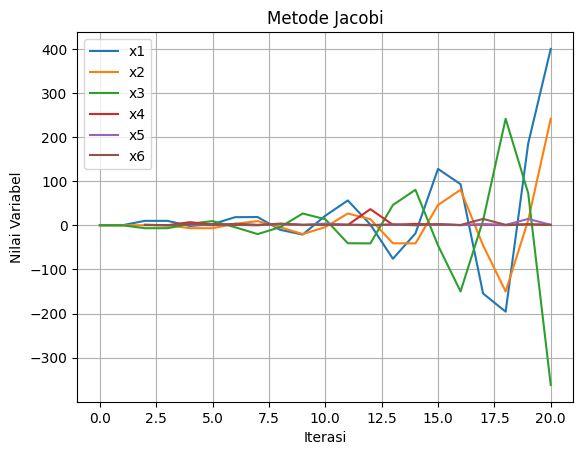

In [ ]:
import numpy as np
import pylab
from prettytable import PrettyTable

def jacobi_iteration(A, B, x_init, max_iter, error_limit):
    t = PrettyTable()
    t.field_names = ['Iterasi', 'x1', 'error x1', 'x2', 'error x2', 'x3', 'error x3', 'x4', 'error x4', 'x5', 'error x5', 'x6', 'error x6']

    n = len(A)
    xawal = x_init.copy()
    xbaru = np.zeros((n, 1), float)
    error = np.zeros((n, 1), float)

    for k in range(max_iter + 1):
        for i in range(0, n):
            tot = 0
            for j in range(0, n):
                if j != i:
                    tot += A[i, j] * xawal[j]
            xbaru[i] = (B[i] - tot) / A[i, i]
        for i in range (0, n):
           error[i] = np.abs((xbaru[i] - xawal[i]) / xbaru[i])

        xawal[:] = xbaru[:]
        row_data = [k] + [round(val[0], 3) for val in xbaru] + [round(val[0], 5) for val in error]
        t.add_row(row_data)

        if np.max(error) < error_limit:
            break

    print(t)
    print('Hasil SPL:')
    for val in xbaru:
      print(round(val[0], 4))

    return xbaru, t

# Matriks koefisien dan vektor hasil
A = np.array([[1, 1, 1, 0, 0, 0],
              [0, -1, 0, 1, -1, 0],
              [0, 0, -1, 0, 0, 1],
              [5, -10, 0, -20, 0, 0],
              [0, 10, -10, 0, -15, -5],
              [0, 0, 0, 0, 1, -1]])

B = np.array([[0], [0], [0], [200], [0], [0]])

# Tebakan awal
x_init = np.array([[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]])

# Jumlah iterasi maksimal dan batas kesalahan
max_iter = 20
error_limit = 1e-5

# Menjalankan metode iterasi Jacobi
result, t_table = jacobi_iteration(A, B, x_init, max_iter, error_limit)

# Plot hasil iterasi
kx = list(range(len(t_table._rows)))
pylab.plot(kx, [row[1] for row in t_table._rows], label='x1')
pylab.plot(kx, [row[3] for row in t_table._rows],  label='x2')
pylab.plot(kx, [row[5] for row in t_table._rows],  label='x3')
pylab.plot(kx, [row[7] for row in t_table.rows],  label = 'x4')
pylab.plot(kx, [row[9] for row in t_table.rows],  label = 'x5')
pylab.plot(kx, [row[11] for row in t_table.rows],  label = 'x6')
pylab.xlabel('Iterasi')
pylab.ylabel('Nilai Variabel')
pylab.title('Metode Jacobi')
pylab.grid(True)
pylab.legend()
pylab.show()


## Metode Gauss Seidel

<ipython-input-20-da90fced1f5a>:22: RuntimeWarning: invalid value encountered in divide
  error[i] = np.abs((xbaru[i] - xawal[i]) / np.abs(xbaru[i]))


+---------+------------+-------------+-------------+-------------+-------------+-------------+-------+----------+-------+----------+-------+----------+
| Iterasi |     x1     |   error x1  |      x2     |   error x2  |      x3     |   error x3  |   x4  | error x4 |   x5  | error x5 |   x6  | error x6 |
+---------+------------+-------------+-------------+-------------+-------------+-------------+-------+----------+-------+----------+-------+----------+
|    0    |    0.0     |     -0.0    |     -0.0    |    -10.0    |     -0.0    |     -0.0    |  nan  |   nan    |  nan  |   1.0    |  nan  |   nan    |
|    1    |    0.0     |    -10.0    |     -0.0    |     -5.0    |    -6.667   |    -6.667   |  nan  |   1.0    |  nan  |   1.0    |  1.0  |   1.0    |
|    2    |    10.0    |    1.667    |    -6.667   |    -8.333   |    7.778    |    7.778    |  1.0  |   7.0    |  1.0  |   0.4    | 1.857 |  1.857   |
|    3    |    5.0     |   -16.111   |    7.778    |    -0.694   |   -18.519   |   -18.5

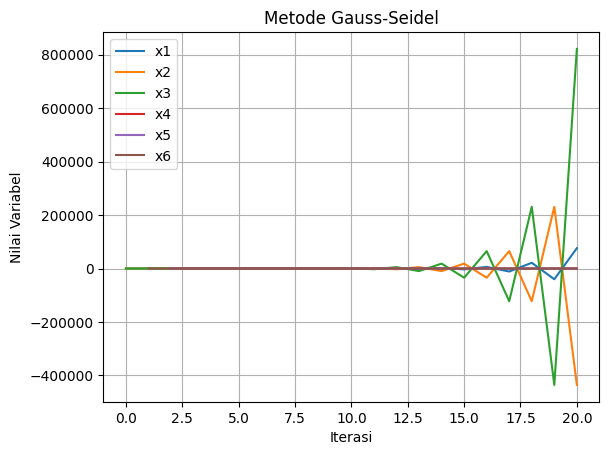

In [ ]:
import numpy as np
import pylab
from prettytable import PrettyTable

def Gauss_Seidel(A, B, x_init, max_iter, error_limit):
    t = PrettyTable()
    t.field_names = ['Iterasi', 'x1', 'error x1', 'x2', 'error x2', 'x3', 'error x3', 'x4', 'error x4', 'x5', 'error x5', 'x6', 'error x6']

    n = len(A)
    xawal = x_init.copy()
    xbaru = np.zeros((n, 1), float)
    error = np.zeros((n, 1), float)
    k = 0

    for k in range(max_iter + 1):
        for i in range(0, n):
            sum_ = 0
            for j in range(0, n):
                if j != i:
                    sum_ += A[i, j] * xawal[j]
            xbaru[i] = (B[i] - sum_) / A[i, i]
            error[i] = np.abs((xbaru[i] - xawal[i]) / np.abs(xbaru[i]))
            xawal[:] = xbaru[:]
        row_data = [k] + [round(val[0], 3) for val in xbaru] + [round(val[0], 3) for val in error]
        t.add_row(row_data)

        if np.max(error) < error_limit:
            break

    print(t)
    print('Hasil SPL:')
    for val in xbaru:
      print(round(val[0], 4))

    return xbaru, t

# Matriks koefisien dan vektor hasil
A = np.array([[1, 1, 1, 0, 0, 0],
              [0, -1, 0, 1, -1, 0],
              [0, 0, -1, 0, 0, 1],
              [5, -10, 0, -20, 0, 0],
              [0, 10, -10, 0, -15, -5],
              [0, 0, 0, 0, 1, -1]])

B = np.array([[0], [0], [0], [200], [0], [0]])

# Tebakan awal
x_init = np.array([[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]])

# Jumlah iterasi maksimal dan batas kesalahan
max_iter = 20
error_limit = 1e-5

# Menjalankan metode iterasi Gauss-Seidel
result, t_table = Gauss_Seidel(A, B, x_init, max_iter, error_limit)

# Plot hasil iterasi
kx = list(range(len(t_table._rows)))
pylab.plot(kx, [row[1] for row in t_table._rows], label='x1')
pylab.plot(kx, [row[3] for row in t_table._rows],  label='x2')
pylab.plot(kx, [row[5] for row in t_table._rows],  label='x3')
pylab.plot(kx, [row[7] for row in t_table.rows],  label = 'x4')
pylab.plot(kx, [row[9] for row in t_table.rows],  label = 'x5')
pylab.plot(kx, [row[11] for row in t_table.rows],  label = 'x6')
pylab.xlabel('Iterasi')
pylab.ylabel('Nilai Variabel')
pylab.title ('Metode Gauss-Seidel')
pylab.grid(True)
pylab.legend()
pylab.show()


Berdasarkan hasil yang didapatkan menggunakan kedua metode, terlihat menghasilkan hasil yang divergen. Hal ini dapat dilihat pada tabel hasil, nilai xn tidak menuju ke satu nilai dengan nilai error tidak mendekati nol.
Berdasarkan plot yang dihasilkan, tampak kedua metode menghasilkan hasil yang divergen. Hal ini terlihat dengan garis yang tidak menuju ke satu nilai, melainkan semakin besar dan fluktuatif

Sehingga, baik metode Jacobi maupun metode Gauss-Seidel tidak dapat menyelesaikan sistem persamaan linear yang diberikan